# SVM assignment

### To solve an interesting letter recognition problem using SVMs. It contains the 26 English alphabets as classes, so it's a multiclass classification problem with 26 classes.
### Each row in the data set represents an image of a handwritten alphabet. Using some basic image processing, the images are converted into m X n pixels, where m and n depend on the size and resolution of the original image.
### Using the pixelated images, 16 features are derived for each image, such as the width of the box, the ratio of the mean variance of x divided by the width of the box, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('letter-recognition.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [12]:
df.shape

(20000, 17)

In [14]:
# scaling the data using Standard Scaler to remove the outliers.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit(df.drop('letter',axis=1)).transform(df.drop('letter',axis=1))
df_scaled=pd.DataFrame(scaled,columns=df.columns[:-1])
df_scaled.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


In [15]:
# splitting the columns in to dependent variable(x) and independent variable(y).
x=df_scaled
y=df['letter']

#### Implementation of SVM

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
# apply svm model without specifying kernel 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [19]:
print('Model accuracy :{0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy :0.945


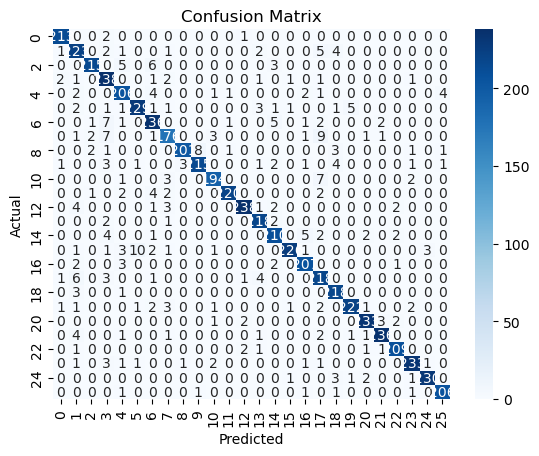

In [25]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g') #g is genral form(65 is in genral not in precentage)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       216
           B       0.88      0.93      0.91       239
           C       0.97      0.94      0.96       229
           D       0.87      0.96      0.91       248
           E       0.91      0.93      0.92       221
           F       0.95      0.93      0.94       246
           G       0.91      0.92      0.91       256
           H       0.91      0.87      0.89       202
           I       0.98      0.92      0.95       218
           J       0.96      0.92      0.94       233
           K       0.96      0.94      0.95       207
           L       0.99      0.95      0.97       231
           M       0.98      0.95      0.96       251
           N       0.94      0.98      0.96       223
           O       0.93      0.93      0.93       226
           P       0.98      0.91      0.94       249
           Q       0.94      0.96      0.95       215
           R       0.87    

In [27]:
#applying SVM model Using Sigmoid Kernel Functions
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.466


In [28]:
#Applying SVM model using Linear Kernel Function
# assumes that the relationship between features is linear
Linear_Classifier = SVC(kernel='linear').fit(x_train,y_train)
y_pred = Linear_Classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy with linear kernel : 0.860


In [29]:
#Apply SVM model using polynomial Kernel fucntion
Poly_svc = SVC(kernel = 'poly',C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy with rbf kernel : 0.885


In [30]:
#Apply SVM model using Guassian RBF Kernel Function
rbf_svc = SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model Accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model Accuracy with rbf kernel : 0.945
